In [1]:
import pandas as pd

df = pd.read_csv("data/house.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
house_data = df.drop(["id","date"],axis = 1)
house_data.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
from sklearn.model_selection import train_test_split

train_data = house_data.drop(["price"],axis=1)
target_data = house_data["price"]

# train : test set을 8:2 나누기
x_train,x_test,y_train,y_test = train_test_split(train_data,target_data,test_size = 0.2)

# 다시 train_set을 8:2로 validation set 만들기
x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train,test_size = 0.2)

print("모든 데이터",train_data.shape)
print("train set",x_train.shape,y_train.shape)
print("validation set",x_valid.shape,y_valid.shape)
print("test set",x_test.shape,y_test.shape)

모든 데이터 (21613, 18)
train set (13832, 18) (13832,)
validation set (3458, 18) (3458,)
test set (4323, 18) (4323,)


In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(x_train,y_train)

print("train set score ",lr.score(x_train,y_train))
print("validation set score ",lr.score(x_valid,y_valid))

train set score  0.6920937394192712
validation set score  0.7191781613166666


In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(2),
                      LinearRegression())

model.fit(x_train,y_train)

print("train set score ",model.score(x_train,y_train))
print("validation set score ",model.score(x_valid,y_valid))

train set score  0.8360637271600508
validation set score  0.7953570972814316


# 미션1 polynomial features가 3인 모델만들기

In [10]:
model3 = make_pipeline(PolynomialFeatures(3),LinearRegression())
model3.fit(x_train,y_train)

print("train set score ",model3.score(x_train,y_train))
print("validation set score ",model3.score(x_valid,y_valid))

train set score  0.88602378120353
validation set score  0.6255488739484114


In [12]:
model3.predict(x_train)

array([726245.07807636, 403788.56500721, 245979.33483601, ...,
       315382.22906017, 576114.81068897, 514136.23288059])

# 자율1

In [19]:
my_data = pd.Series({
    "bedrooms" : 2,
    "bathrooms": 2.5,
    "sqft_living" : 3000,
    "sqft_lot" : 5500,
    "floors" : 4,
    "waterfront" : 0,
    "view" : 0,
    "condition" : 3,
    "grade" : 9,
    "sqft_above" : 2350,
    "sqft_basement": 500,
    "yr_built" : 2002,
    "yr_renovated": 0,
    "zipcode": 98000,
    "lat" : 47.5317,
    "long" : -122.391,
    "sqft_living15" : 2900,
    "sqft_lot15" : 3900
    
})

my_df = pd.DataFrame([my_data])

lr.predict(my_df)

array([884189.01896328])

# 자율2 Decision Tree Regressor

In [15]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(x_train,y_train)

print("train set score ",tree.score(x_train,y_train))
print("validation set score ",tree.score(x_valid,y_valid))

train set score  0.9994879700198785
validation set score  0.696802867970345


# 자율3 여러 모델을 그래프로 표현하기

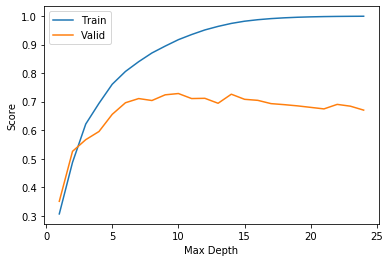

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

train_score = []
valid_score = []

depth_range = range(1,25)
for depth in depth_range:
    tree = DecisionTreeRegressor(max_depth = depth).fit(x_train,y_train)
    
    train_score.append(tree.score(x_train,y_train))
    valid_score.append(tree.score(x_valid,y_valid))
    
plt.plot(depth_range,train_score)
plt.plot(depth_range,valid_score)

plt.legend(["Train","Valid"])

plt.xlabel("Max Depth")
plt.ylabel("Score")

plt.show()